In [1]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

# import functions from sklearn to perform different clustering algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances

# import functions from scipy to plot the dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

# 'PCA' function to perform principal component analysis using the sklearn library
from sklearn.decomposition import PCA

In [ ]:
wq  = pd.DataFrame

In [23]:
wine = pd.read_csv('wine.xls')

In [24]:
wine.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [25]:
# understanding the dimensions of the data
print('number of rows in the dataset :',wine.shape[0])
print('number of columns in the dataset :',wine.shape[1])

number of rows in the dataset : 178
number of columns in the dataset : 13


In [26]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1 to 3
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity of ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280/OD315 of diluted wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: floa

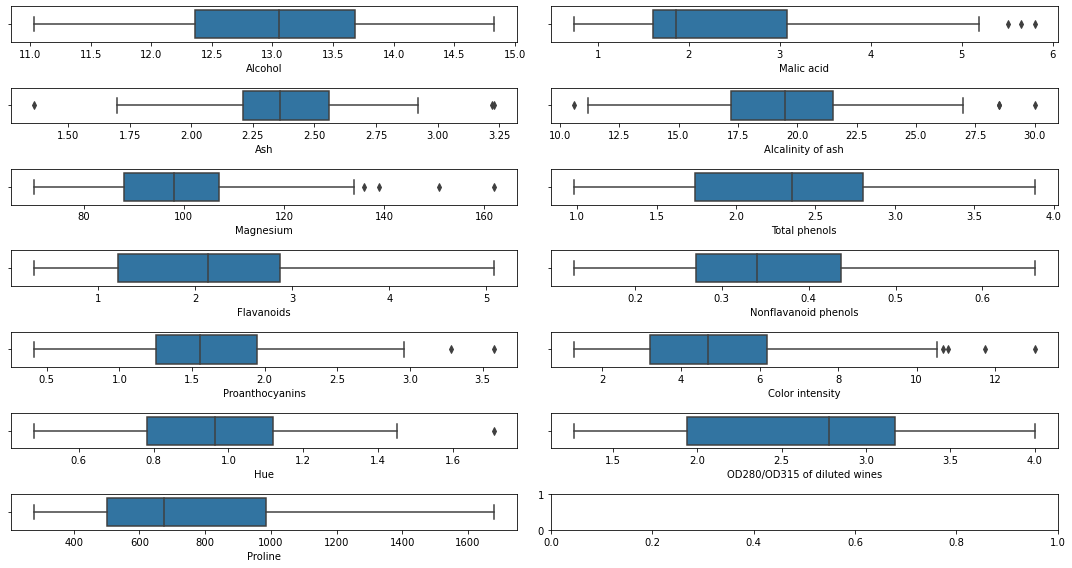

In [29]:
fig, ax = plt.subplots(nrows = 7, ncols = 2, figsize=(15, 8))
for variable, subplot in zip(wine.columns, ax.flatten()):     
    sns.boxplot(wine[variable], ax = subplot)
plt.tight_layout()
plt.show()

In [33]:
Q1 = wine.quantile(0.25)
Q3 = wine.quantile(0.75)
IQR = Q3 - Q1
wine_2 = wine[~((wine < (Q1 - 1.5 * IQR)) | (wine > (Q3 + 1.5 * IQR))).any(axis=1)]
wine_2 = wine.reset_index(drop = True)

In [34]:
wine_2.shape

(178, 13)

In [35]:
wine_2.isnull().sum()

Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [36]:
wine_2.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [37]:
ss = StandardScaler()
wine_ss = ss.fit_transform(wine_2)
features_scaled = pd.DataFrame(wine_ss, columns = wine_2.columns)
features_scaled.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


# K-MEANS

In [39]:
wcss  = []
for i in range(1,8):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

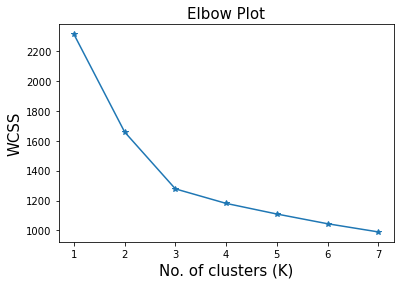

In [40]:
# visualize the elbow plot to get the optimal value of K
plt.plot(range(1,8), wcss, marker = '*')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('No. of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

In [ ]:
# k=3 is the last point where the slope change is observed hance we can consider k=3 and build a model

In [41]:
n_clusters = [2, 3, 4, 5, 6, 7]
for K in n_clusters :
    cluster = KMeans (n_clusters = K, random_state = 10)
    predict = cluster.fit_predict(features_scaled)
    score = silhouette_score(features_scaled, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 2, silhouette score is 0.26831340971052126)
For n_clusters = 3, silhouette score is 0.2848589191898987)
For n_clusters = 4, silhouette score is 0.24519129323772165)
For n_clusters = 5, silhouette score is 0.23223087806001866)
For n_clusters = 6, silhouette score is 0.23533337693317755)
For n_clusters = 7, silhouette score is 0.15443603752268886)


In [ ]:
# as per silhouete scores k=3 has the highest value i.e. better heterogenity among clusters

In [42]:
# model
K_model = KMeans(n_clusters= 3, random_state= 10)
K_model.fit(features_scaled)

KMeans(n_clusters=3, random_state=10)

In [43]:
wine_2['Kmeans_label'] = K_model.labels_
wine_2.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Kmeans_label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [44]:
np.unique(K_model.labels_, return_counts=True)  

(array([0, 1, 2]), array([62, 65, 51], dtype=int64))

In [46]:
centers = pd.DataFrame(K_model.cluster_centers_, columns =  features_scaled.columns)      
centers

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.835232,-0.303810,0.364706,-0.610191,0.577587,0.885237,0.977820,-0.562090,0.580287,0.171063,0.473984,0.779247,1.125185
1,-0.926072,-0.394042,-0.494517,0.170602,-0.491712,-0.075983,0.020813,-0.033534,0.058266,-0.901914,0.461804,0.270764,-0.753846
2,0.164907,0.871547,0.186898,0.524367,-0.075473,-0.979330,-1.215248,0.726064,-0.779706,0.941539,-1.164789,-1.292412,-0.407088


In [47]:
# hierarchial clustering
# hierarchial agglomerative
link_mat = linkage(features_scaled, method = 'ward')     

# print first 10 observations of the linkage matrix 'link_mat'
print(link_mat[0:10])

[[  9.          47.           1.16411367   2.        ]
 [131.         133.           1.19160238   2.        ]
 [ 11.          12.           1.20935571   2.        ]
 [ 15.          53.           1.22551046   2.        ]
 [ 92.         107.           1.24538798   2.        ]
 [ 34.          37.           1.26841838   2.        ]
 [  0.          20.           1.28789316   2.        ]
 [ 16.          17.           1.2917937    2.        ]
 [164.         172.           1.30048379   2.        ]
 [ 22.          29.           1.33566687   2.        ]]


In [52]:
plt.rcParams['figure.figsize'] = [15,8]

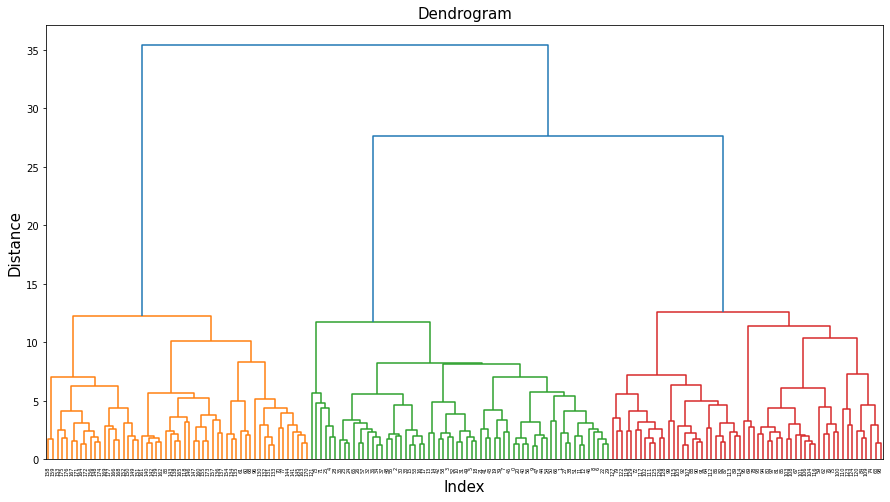

In [53]:
dendro = dendrogram(link_mat)
for i, d, c in zip(dendro['icoord'], dendro['dcoord'], dendro['color_list']):
    x = sum(i[1:3])/2
    y = d[1]
    if y > 60:
        plt.plot(x, y, 'o', c=c)
        plt.annotate("%.3g" % y, (x, y), xytext=(0, -5), textcoords='offset points', va='top', ha='center')
plt.title('Dendrogram', fontsize = 15)
plt.xlabel('Index', fontsize = 15)
plt.ylabel('Distance', fontsize = 15)
plt.show()

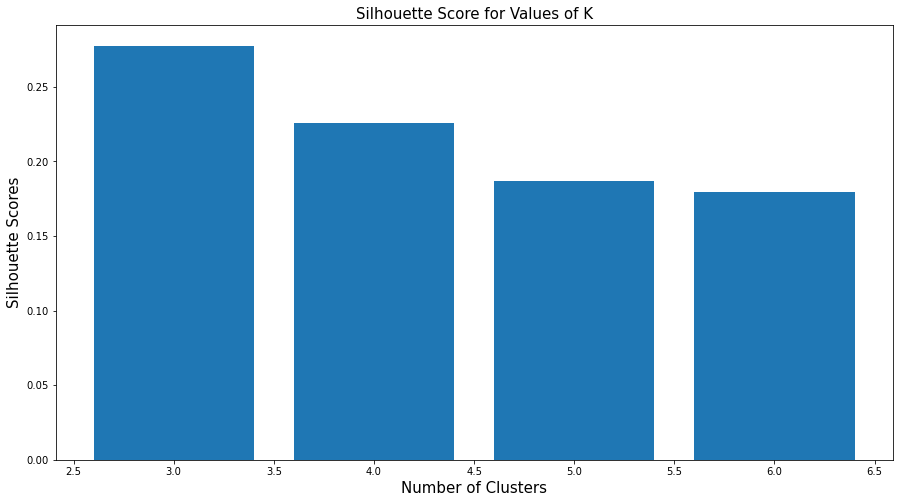

In [57]:
K = [3, 4, 5, 6]
silhouette_scores = [] 
for i in K:
    hierar_model = AgglomerativeClustering(n_clusters = i, linkage = 'ward') 
    silhouette_scores.append(silhouette_score(features_scaled, hierar_model.fit_predict(features_scaled))) 
plt.bar(K, silhouette_scores) 
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)
plt.show()

In [55]:
# 3 clusters have thge highest shilouete score which is a good sign

In [58]:
# instantiate clustering method with 3 clusters and 'ward' linkage method
hierar_clusters = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')

# fit the model on the scaled data
hierar_clusters.fit(features_scaled)

AgglomerativeClustering(n_clusters=3)

In [59]:
# add a column containing cluster number to the original data
# the 'labels_' returns the cluster number for each observation
wine_2['Hierar_label'] = hierar_clusters.labels_

# print head() of the dataframe
wine_2.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Kmeans_label,Hierar_label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0,2


In [60]:
wine_2['Hierar_label'].value_counts()

2    64
0    58
1    56
Name: Hierar_label, dtype: int64

# PCA

In [64]:
# pca method
pca = PCA(n_components= 5)
pca_data = pca.fit_transform(wine_ss)
pca_data

array([[ 3.31675081, -1.44346263, -0.16573904, -0.21563119,  0.69304284],
       [ 2.20946492,  0.33339289, -2.02645737, -0.29135832, -0.25765463],
       [ 2.51674015, -1.0311513 ,  0.98281867,  0.72490231, -0.25103312],
       [ 3.75706561, -2.75637191, -0.17619184,  0.56798331, -0.31184159],
       [ 1.00890849, -0.86983082,  2.02668822, -0.40976579,  0.2984575 ],
       [ 3.05025392, -2.12240111, -0.62939583, -0.51563749, -0.63201873],
       [ 2.44908967, -1.17485013, -0.97709489, -0.0658305 , -1.02776191],
       [ 2.05943687, -1.60896307,  0.14628188, -1.19260801,  0.07690349],
       [ 2.5108743 , -0.91807096, -1.77096903,  0.05627036, -0.89225698],
       [ 2.75362819, -0.78943767, -0.98424749,  0.34938157, -0.46855308],
       [ 3.47973668, -1.30233324, -0.42273522,  0.02684176, -0.33837478],
       [ 1.7547529 , -0.61197723, -1.19087832, -0.89016434, -0.73857266],
       [ 2.11346234, -0.67570634, -0.86508643, -0.35643801, -1.20992872],
       [ 3.45815682, -1.13062988, -1.2

1201.157500365354
825.0208377375329
723.9357491371676
659.4828354871119
613.1832838293973


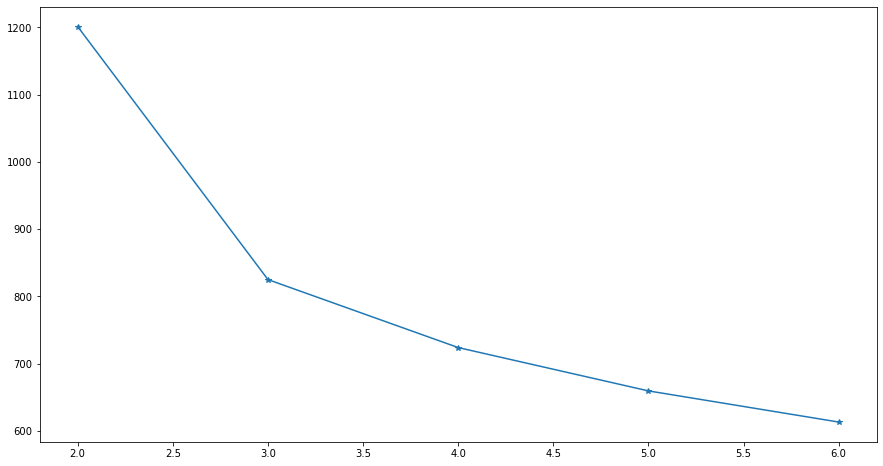

In [68]:
wss=[]
cl=[2,3,4,5,6]
for k in cl:
    mod=KMeans(k)
    mod.fit(pca_data)
    print(mod.inertia_)
    wss.append(mod.inertia_)
plt.plot(cl,wss,marker = '*')

In [69]:
sil=[]
cl=[2,3,4,5,6]
for k in cl:
    mod=KMeans(k)
    mod.fit(pca_data)
    sil.append(silhouette_score(pca_data,mod.labels_))
sil

[0.3239172262417323,
 0.36907631946992275,
 0.32852337191658537,
 0.31775964946822305,
 0.32396111048094334]

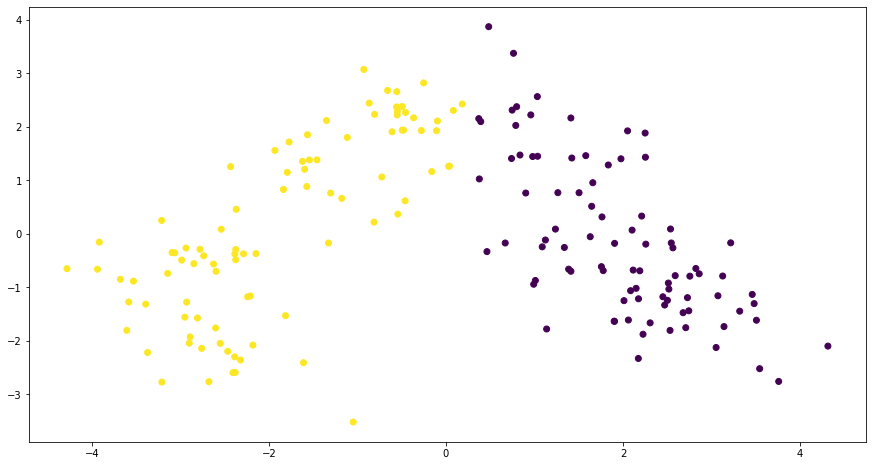

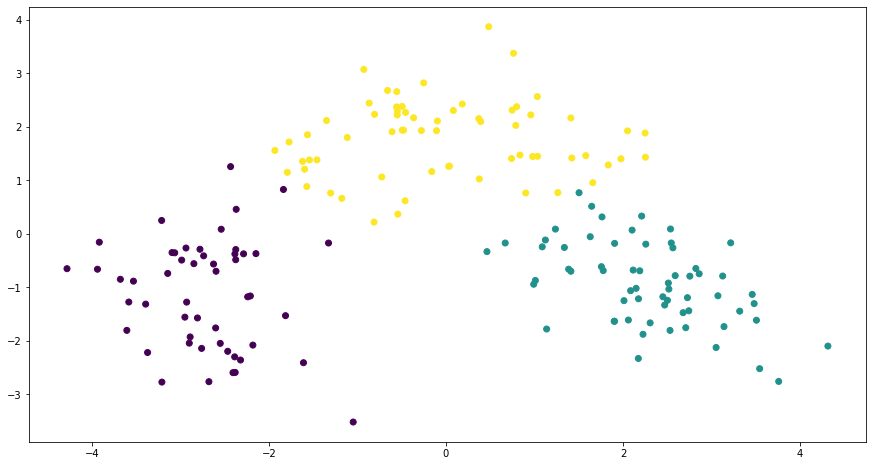

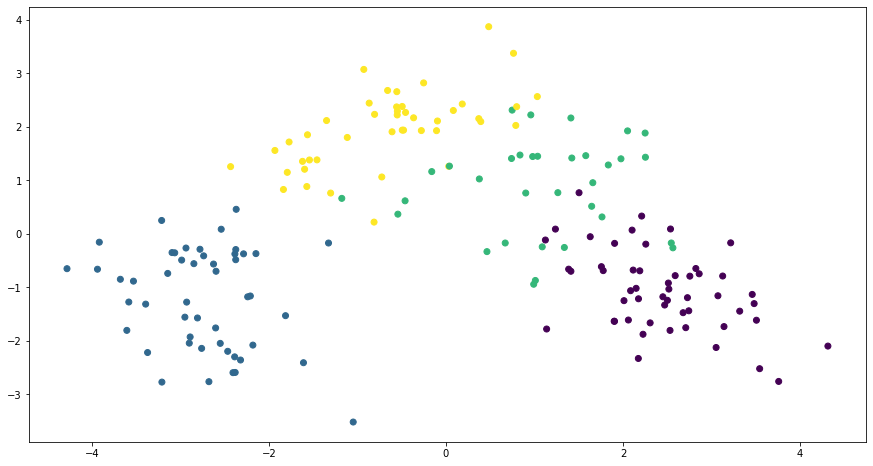

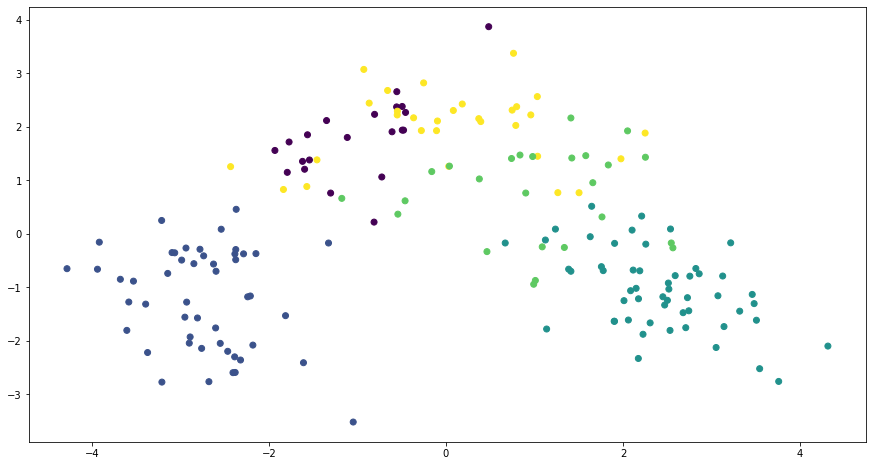

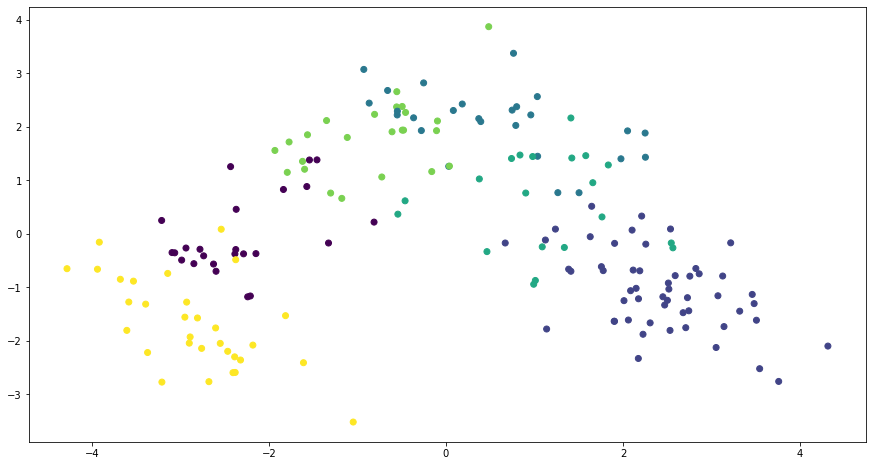

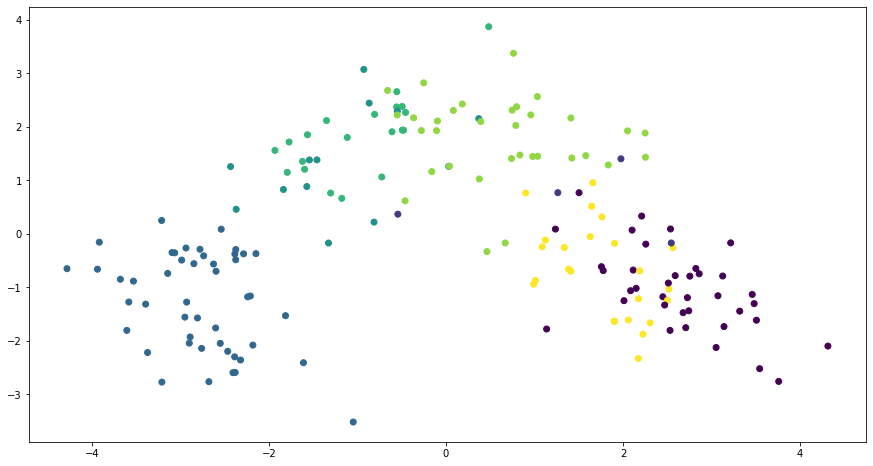

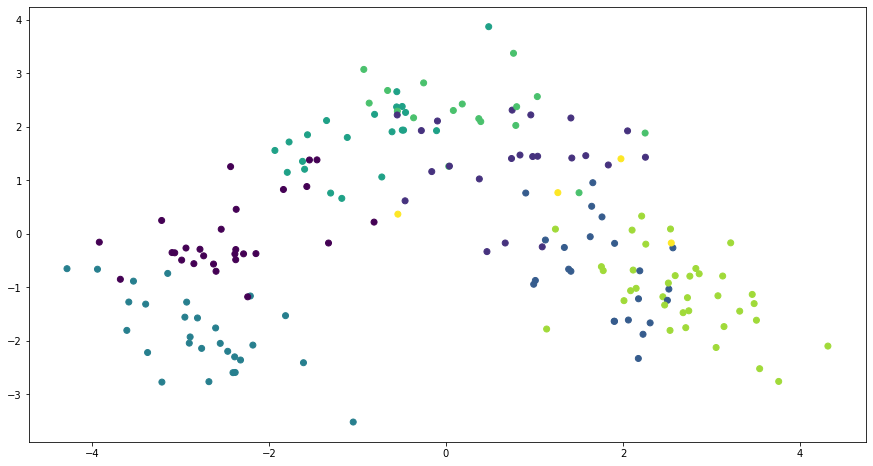

In [70]:
for i in [2,3,4,5,6,7,8]:
    mod = KMeans(i)
    mod.fit(pca_data)
    labels = mod.labels_
    cent = mod.cluster_centers_
    plt.scatter(pca_data[:,0],pca_data[:,1],c=labels)
    plt.show() 